In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


In [15]:
b = pd.read_csv('../data/boston.csv')
b.dropna() 
b.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [29]:

b_features = b[['age', 'tax', 'medv']]

scaler_m = MinMaxScaler()
b_features_m = pd.DataFrame(scaler_m.fit_transform(b_features))
b_features_m.columns = [['age', 'tax', 'medv']]

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(b_features_m)

GaussianMixture(n_components=3, n_init=10)

In [30]:
# 데이터가 속한 군집 번호

gm.predict(b_features_m)

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
gm.predict_proba(b_features_m)

array([[0.00000000e+00, 9.99827546e-01, 1.72453631e-04],
       [0.00000000e+00, 8.30307963e-01, 1.69692037e-01],
       [0.00000000e+00, 1.00000000e+00, 1.18640297e-10],
       [0.00000000e+00, 9.99998834e-01, 1.16573282e-06],
       [0.00000000e+00, 9.99618012e-01, 3.81988333e-04],
       [0.00000000e+00, 1.69723067e-01, 8.30276933e-01],
       [0.00000000e+00, 6.08631805e-01, 3.91368195e-01],
       [0.00000000e+00, 1.00000000e+00, 3.82752772e-16],
       [0.00000000e+00, 9.99992442e-01, 7.55813579e-06],
       [0.00000000e+00, 5.09746258e-01, 4.90253742e-01],
       [0.00000000e+00, 9.99999924e-01, 7.61928534e-08],
       [0.00000000e+00, 1.00000000e+00, 5.93363685e-22],
       [0.00000000e+00, 1.00000000e+00, 1.00421386e-17],
       [0.00000000e+00, 1.53899018e-01, 8.46100982e-01],
       [0.00000000e+00, 2.72940132e-01, 7.27059868e-01],
       [0.00000000e+00, 2.07665814e-01, 7.92334186e-01],
       [0.00000000e+00, 1.79763778e-01, 8.20236222e-01],
       [0.00000000e+00, 2.83063

In [32]:
gm.bic(b_features_m)

-1058.503782187836

In [33]:
gm.aic(b_features_m)

-1168.9399143972687

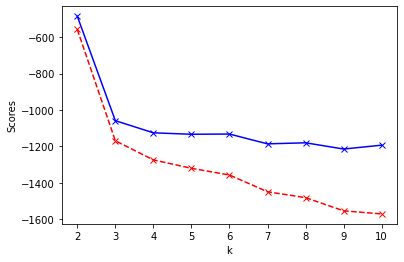

In [34]:
bic = list()
aic = list()

K = range(2,11)
for k in K:
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(b_features_m)
    bic.append(gm.bic(b_features_m))
    aic.append(gm.aic(b_features_m))
    
plt.plot(K, bic, 'bx-')
plt.plot(K, aic, 'rx--')
plt.xlabel('k')
plt.ylabel('Scores')
plt.show()

In [26]:
###bic는 k:=10일때 가장 작은 값
#aic또한 k=10일때 가장 작은 값
#10개로 묶어서 군집화 시행

In [36]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(b_features_m)
np.round(bgm.weights_, 2)

array([0.22, 0.25, 0.31, 0.02, 0.06, 0.08, 0.01, 0.  , 0.05, 0.  ])

In [40]:
clus = bgm.predict(b_features_m)

unique, counts = np.unique(clus, return_counts=True)
dict(zip(unique, counts))

{0: 79, 1: 83, 2: 103, 3: 5, 4: 19, 5: 22, 6: 4, 8: 18}

In [41]:
b_features_m['Label'] = clus
b_features_m.columns = b_features_m.columns.get_level_values(0)
grouped = b_features_m.groupby('Label')
grouped.mean()

,age,tax,medv
Label,,,
0,0.888096,0.309340,0.313277
1,0.907562,0.918105,0.224900
2,0.375511,0.210399,0.391327
3,0.447447,0.913958,0.346667
4,0.853080,0.196136,0.787368
5,0.473888,0.083695,0.716667
6,0.965691,0.913958,1.000000
8,0.196749,0.265881,0.628148


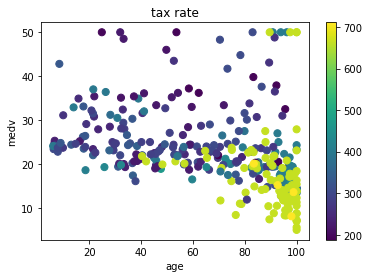

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(b['age'],b['medv'],
                     c=b['tax'],s=50)
ax.set_title('tax rate')
ax.set_xlabel('age')
ax.set_ylabel('medv')
plt.colorbar(scatter)